In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv


In [2]:
data = pd.read_csv('/kaggle/input/the-boston-houseprice-data/boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

In [3]:
data = data.rename(columns={'CRIM': 'CRIME', 'ZN':'PROPORTION_ZL', 'CHAS':'RIVER', 
                            'RM':'ROOMS', 'RAD':'HIGHWAYS', 'TAX':'TAX_PRICE', 'B':'BLACKS', 'MEDV': 'SALEPRICE'})
data.head()

,CRIME,PROPORTION_ZL,INDUS,RIVER,NOX,ROOMS,AGE,DIS,HIGHWAYS,TAX_PRICE,PTRATIO,BLACKS,LSTAT,SALEPRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.describe()

,CRIME,PROPORTION_ZL,INDUS,RIVER,NOX,ROOMS,AGE,DIS,HIGHWAYS,TAX_PRICE,PTRATIO,BLACKS,LSTAT,SALEPRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CRIME          506 non-null    float64
 1   PROPORTION_ZL  506 non-null    float64
 2   INDUS          506 non-null    float64
 3   RIVER          506 non-null    int64  
 4   NOX            506 non-null    float64
 5   ROOMS          506 non-null    float64
 6   AGE            506 non-null    float64
 7   DIS            506 non-null    float64
 8   HIGHWAYS       506 non-null    int64  
 9   TAX_PRICE      506 non-null    float64
 10  PTRATIO        506 non-null    float64
 11  BLACKS         506 non-null    float64
 12  LSTAT          506 non-null    float64
 13  SALEPRICE      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [8]:
features = ['CRIME','PROPORTION_ZL','INDUS', 'RIVER', 'NOX', 'ROOMS', 'AGE', 
            'DIS', 'HIGHWAYS', 'TAX_PRICE', 'PTRATIO', 'BLACKS', 'LSTAT']
X = data[features]
y = data['SALEPRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40, train_size = 0.8)

In [9]:
model = RandomForestRegressor(random_state=40)

model.fit(X_train, y_train)
val_preds = model.predict(X_test)

In [10]:
def score_model(model, X_t=X_train, X_v=X_test, y_t=y_train, y_v=y_test):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

score_model(model)


2.529156862745098

In [11]:
model.score(X_test, y_test)

0.8549905088601876

In [12]:
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

In [13]:
def score_models(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %.3f" % (i+1, mae))


Model 1 MAE: 2.565
Model 2 MAE: 2.515
Model 3 MAE: 2.502
Model 4 MAE: 2.755
Model 5 MAE: 2.568


<Axes: ylabel='Frequency'>

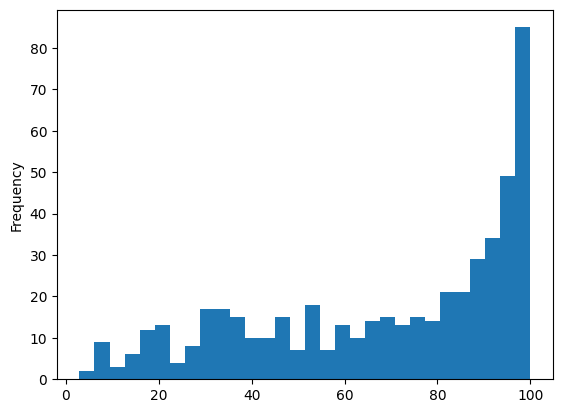

In [14]:
data['AGE'].plot.hist(bins=30)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


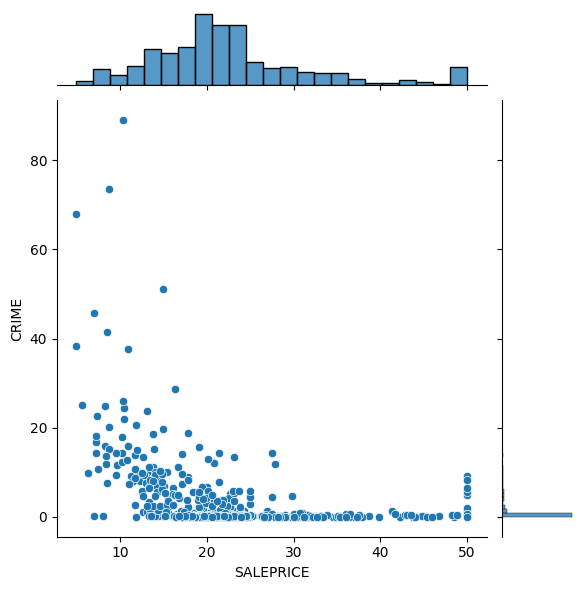

In [24]:
import seaborn as sns

#data.plot.scatter(x='SALEPRICE', y='CRIME')
sns.jointplot(x='SALEPRICE', y='CRIME', data=data)

Es podria dir que les cases que tenen un preu menor, tenen un índex de criminalitat més alta. Més concretament es podria confirmar que els index de criminalitat més elevada serien les cases al voltant de 18.000 y 25.000 dolars.

Ara vull saber com es correlacionen les seguents variables: 'SALEPRICE', 'CRIME', 'NOX'

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

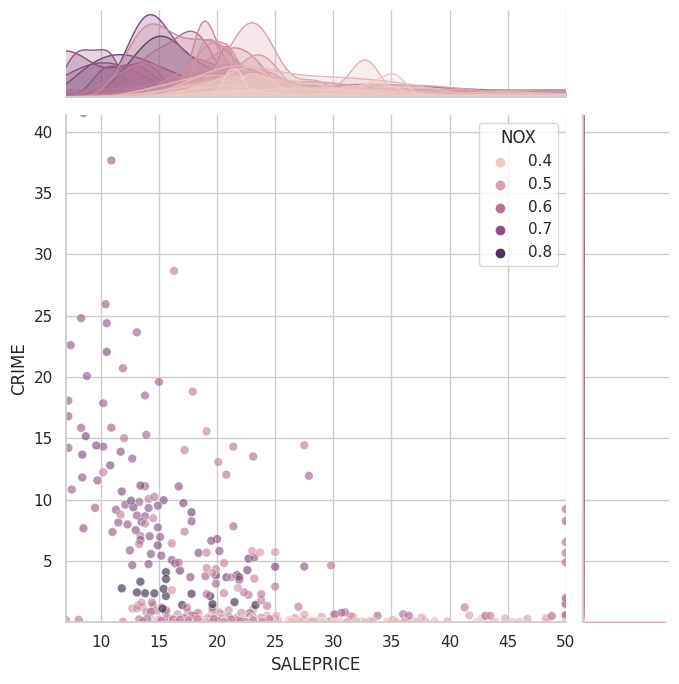

In [31]:
g = sns.jointplot(
    x='SALEPRICE', y='CRIME', hue='NOX', 
    data=data, height=7, alpha=0.6, s=40,
)
g.ax_joint.set_xlim(data['SALEPRICE'].quantile(0.01),
                    data['SALEPRICE'].quantile(0.99))
g.ax_joint.set_ylim(data['CRIME'].quantile(0.01),
                    data['CRIME'].quantile(0.99))

sns.set_style('whitegrid')
sns.set_context('notebook')


Com es pot veure en el gràfic, index de contaminació del gas NO2 y index de criminalitat estan correlacionats i també podem veure que especilament la contaminació està relacionada amb SALEPRICE més baixos de 25.000$

<Axes: >

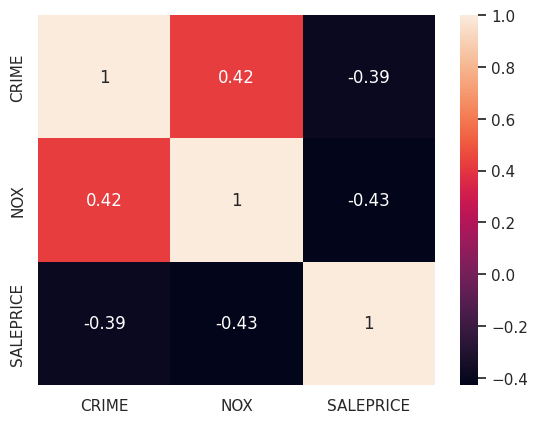

In [34]:
data_corr = data[['CRIME', 'NOX', 'SALEPRICE']]
data_corr = data_corr.corr()
sns.heatmap(data=data_corr, annot=True)

Aquest heatmap, ens demostra la correlació d'aquestes variables. S'observa correlació, però tampoc molt forta.

<Axes: >

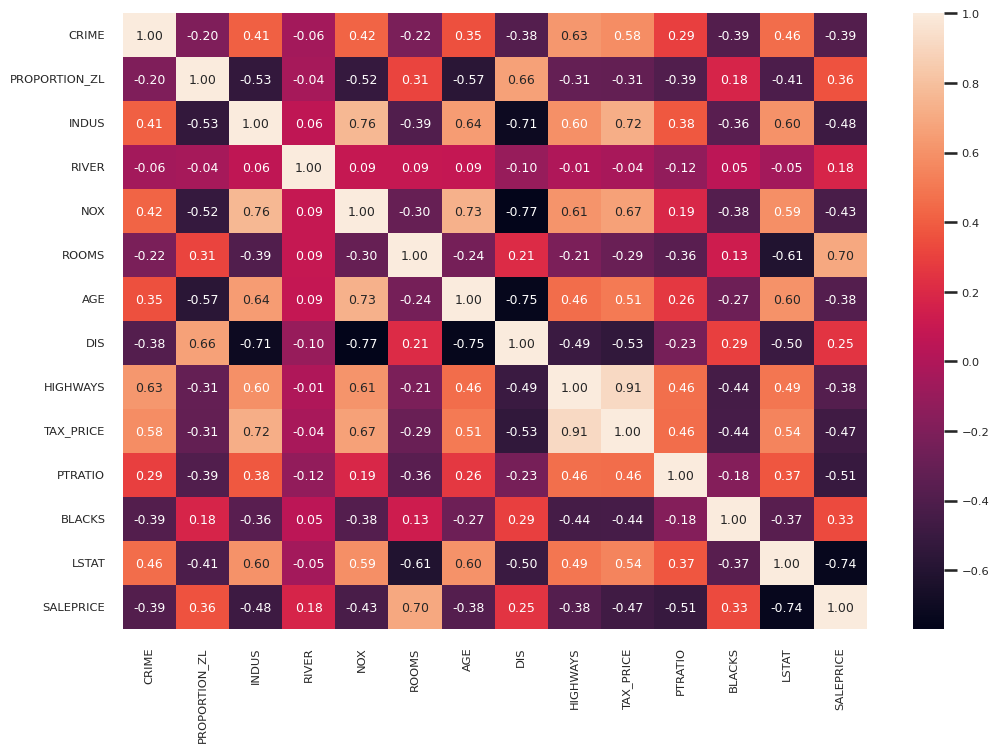

In [45]:
import matplotlib.pyplot as plt

data_corr2 = data.corr()

plt.figure(figsize=(12, 8))
sns.set_context('talk', font_scale=0.5)
sns.heatmap(data=data_corr2, annot=True, fmt='.2f')

Correlaciones más representativas:<br>
DIS --> INDUS <br>
DIS --> NOX <br>
DIS --> AGE <br>
ROOMS --> LSTAT <br>
LSTAT --> SALEPRICE <br>

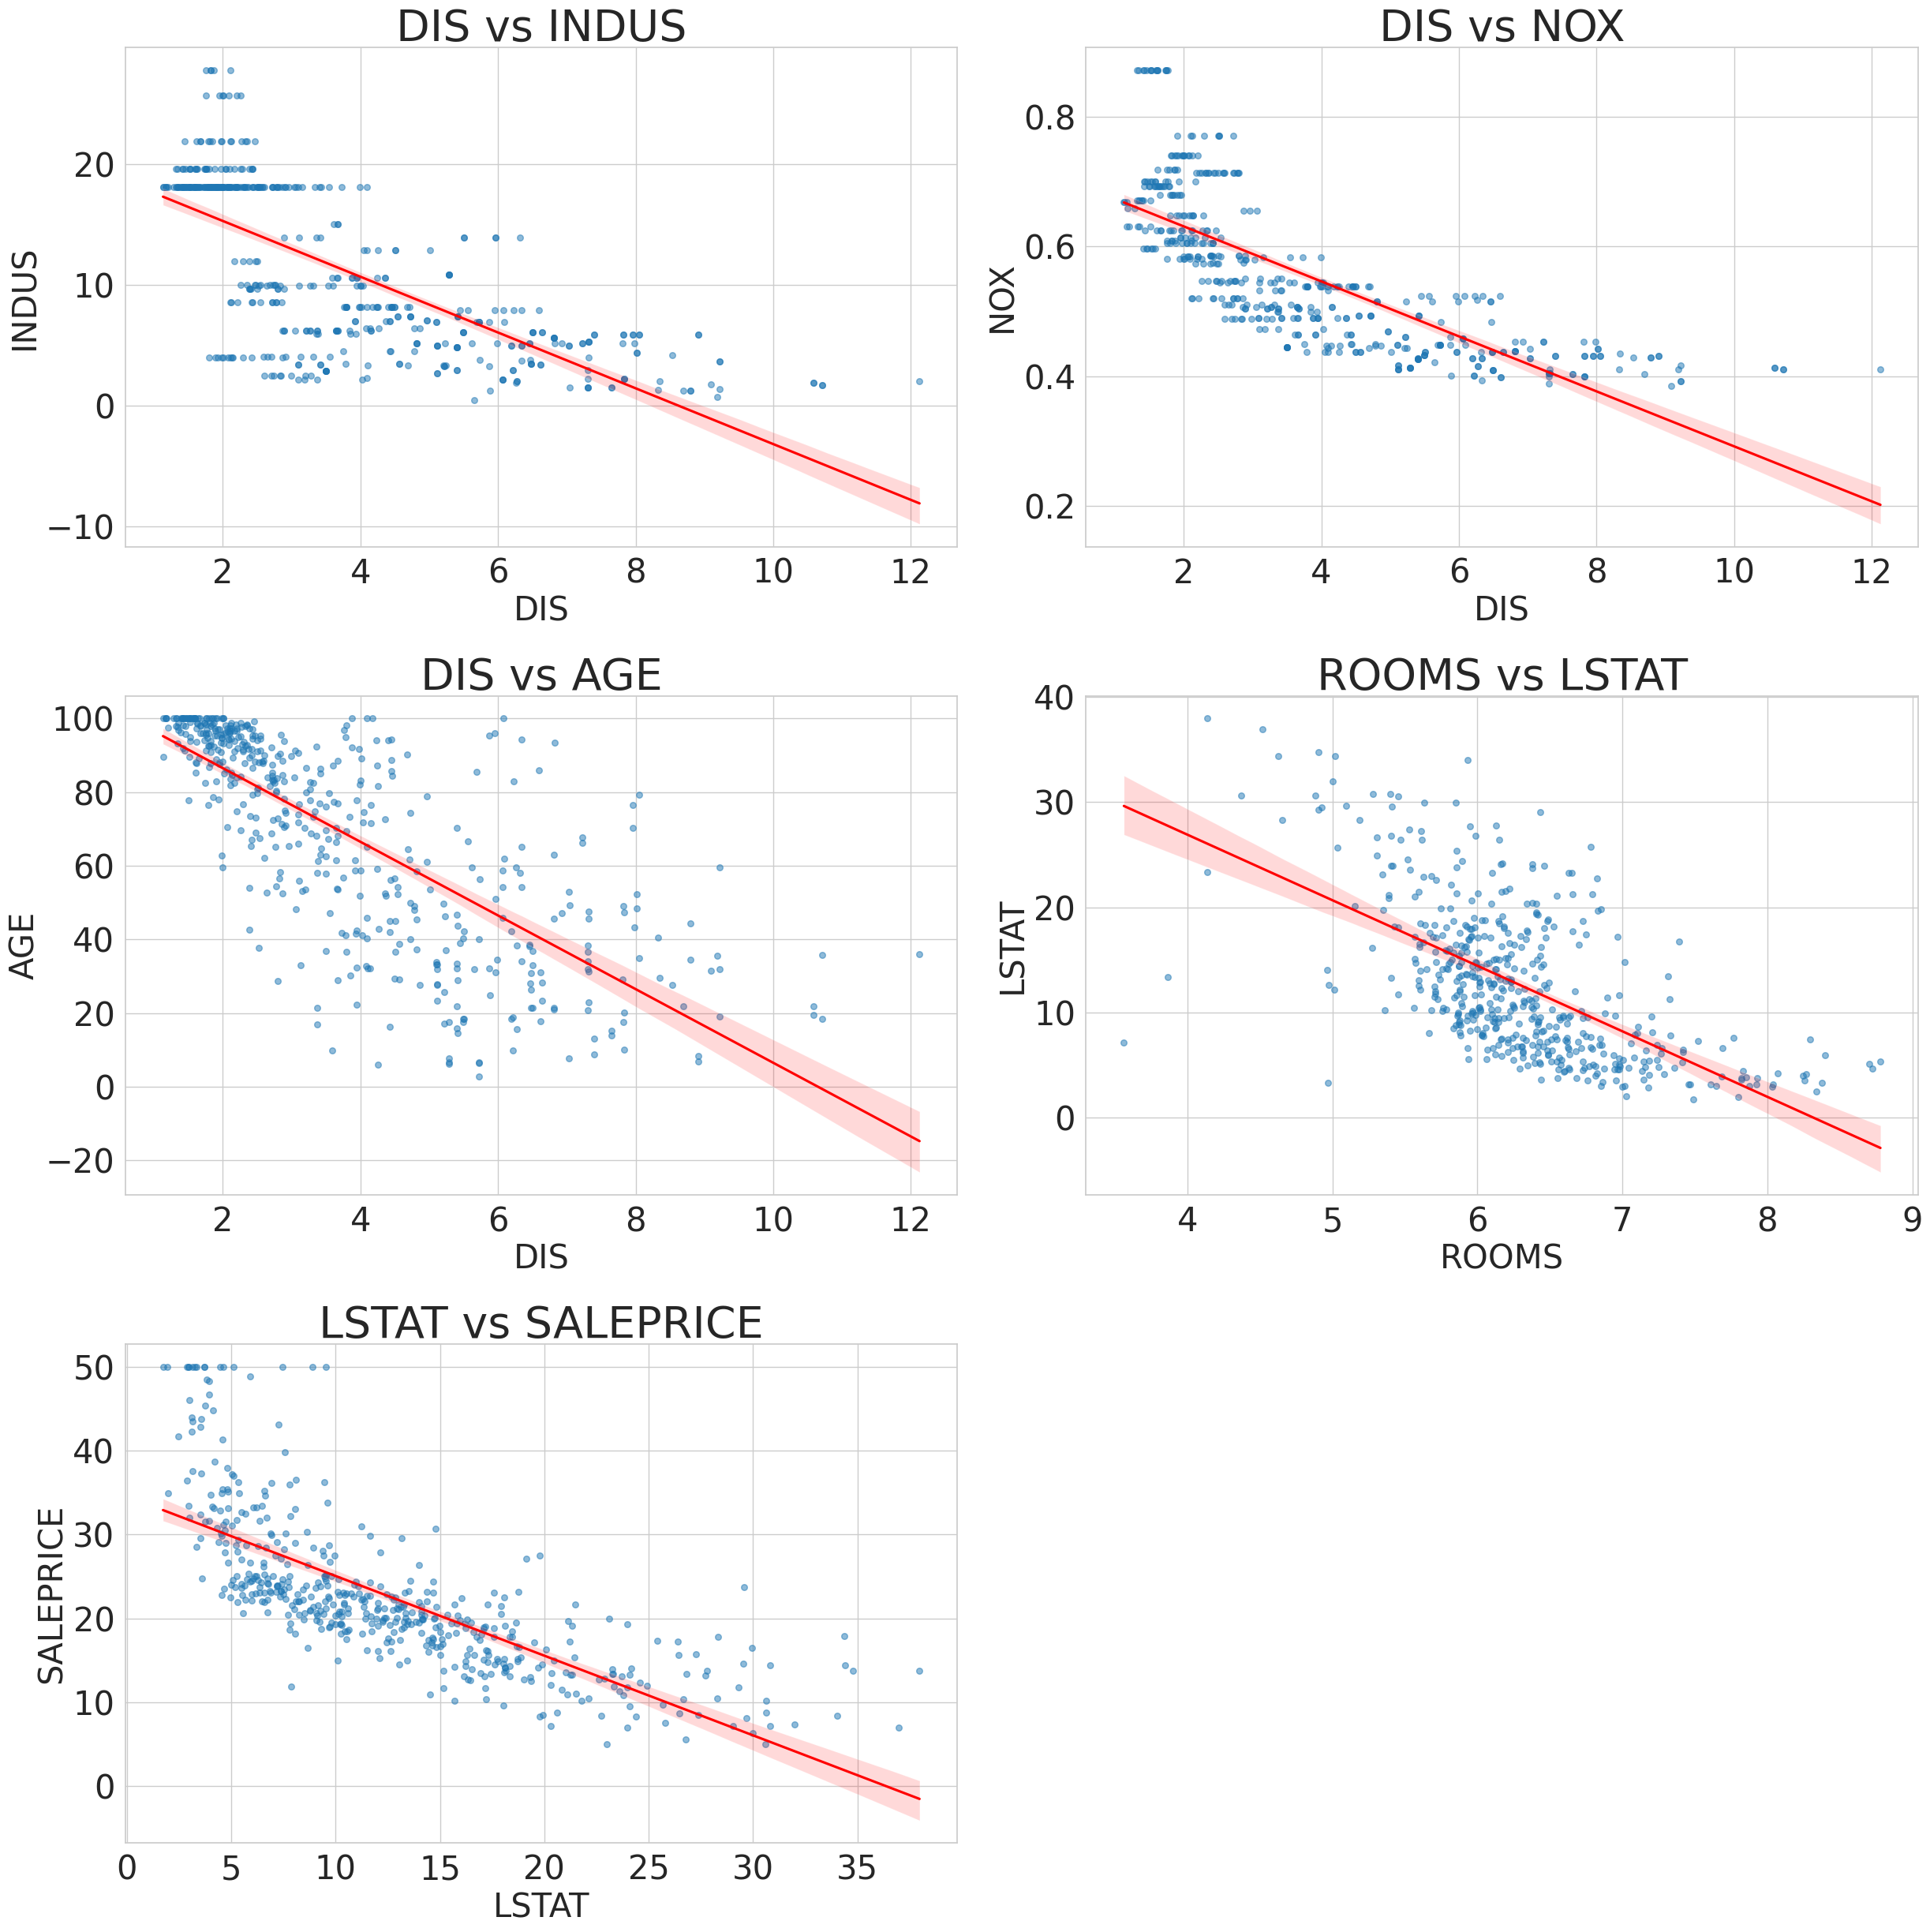

In [62]:
pairs = (
    ('DIS', 'INDUS'),
    ('DIS', 'NOX'),
    ('DIS', 'AGE'),
    ('ROOMS', 'LSTAT'),
    ('LSTAT', 'SALEPRICE')
)

sns.set_context('notebook', font_scale=2)

fig, axes = plt.subplots(3, 2, figsize=(25, 25))
axes=axes.flatten()

for ax, (x, y) in zip(axes, pairs):
    sns.regplot(x=x, y=y,data=data, ax=ax,
               scatter_kws={'alpha':0.5, 's':30, },
               line_kws={'color':'red'})
    ax.set_title(f"{x} vs {y}", fontsize=40)
    ax.set_xlabel(x, fontsize=30)
    ax.set_ylabel(y, fontsize=30)
    ax.tick_params(axis="both", labelsize=30)


for ax in axes[len(pairs):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

En estos graficos podemos ver lo siguiente: <br>
* Cuanta menos distancia hay desde la casa a 5 sitios de empleo de Boston hay más proporción de fabricas <br>
* Menos distancia hasta 5 sitios de empleo de Boston == más contaminación (NO2)
* Practicamente el 100% de todas las viviendas cerca de zonas de trabajo de Boston fueron ocupadas antes del 1940. Lo que quiere decir que son centros de ciudades, seguramente de Boston y que estan casas son almenos tan antiguas como del 1940
* Cuanto menos proporcion de low status population más habitaciones tienden a tener las casas.
* Cuanta menos proporcion de low status population más caras tienden a ser las casas